In [1]:
from importlib import reload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./dracula.mplstyle')
import logging
logging.basicConfig()
LOG = logging.getLogger(__name__)
LOG.setLevel(logging.INFO)
LOG.info('Hello from notebook')

from pydataset import data
df = data('diamonds').reset_index().set_index('index')

import frankenfit as ff
reload(ff)

# logging.getLogger('frankenfit').setLevel(logging.DEBUG)

INFO:__main__:Hello from notebook


<module 'frankenfit' from '/home/max/frankenfit/src/frankenfit/__init__.py'>

In [2]:
try:
    client.shutdown()
    cluster.close()
except:
    pass

In [3]:
from dask import distributed
cluster = distributed.LocalCluster(
    n_workers=4, threads_per_worker=2, host="devbox.homenet.thebanes.org",
    scheduler_port=0, dashboard_address=':0'
)
print(cluster.dashboard_link)
client = distributed.Client(cluster)
client

#cluster = distributed.LocalCluster(n_workers=1, threads_per_worker=1)
#client = distributed.Client(cluster)
#client = distributed.Client()
#client

2022-12-14 21:05:25,391 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-onuew3ak', purging
2022-12-14 21:05:25,392 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-je24kpd5', purging
2022-12-14 21:05:25,392 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-bv7t871b', purging
2022-12-14 21:05:25,393 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-g0enkb_5', purging


http://10.0.2.82:45373/status


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://10.0.2.82:45373/status,
Dashboard: http://10.0.2.82:45373/status,Workers: 4
Total threads: 8,Total memory: 23.47 GiB
Status: running,Using processes: True
Comm: tcp://10.0.2.82:34395,Workers: 4
Dashboard: http://10.0.2.82:45373/status,Total threads: 8
Started: Just now,Total memory: 23.47 GiB
Comm: tcp://10.0.2.82:41393,Total threads: 2
Dashboard: http://10.0.2.82:37669/status,Memory: 5.87 GiB
Nanny: tcp://10.0.2.82:37113,


In [4]:
dask = ff.DaskBackend(client)
dask

DaskBackend(addr='tcp://10.0.2.82:34395', trace=())

In [5]:
p = (
    ff.ReadDataset('./diamonds.csv', format='csv', index_col='index')
    .then()
    .z_score(["price"])
    .clip(["price"], lower=-2, upper=2)
)
p

DataFramePipeline(tag='1', transforms=[ReadDataset(tag='1', paths=['./diamonds.csv'], columns=None, format='csv', filter=None, index_col='index', dataset_kwargs=None, scanner_kwargs=None, no_cache=False), ZScore(tag='1', cols=['price'], w_col=None), Clip(tag='1', cols=['price'], upper=2, lower=-2)])

In [6]:
p.apply().head()

,carat,cut,color,clarity,depth,table,price,x,y,z
index,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,-0.904087,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,-0.904087,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,-0.903836,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,-0.902081,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,-0.901831,4.34,4.35,2.75


In [7]:
dask.apply(p).result().head()

,carat,cut,color,clarity,depth,table,price,x,y,z
index,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,-0.904087,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,-0.904087,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,-0.903836,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,-0.902081,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,-0.901831,4.34,4.35,2.75


In [8]:
p.on_backend(dask).apply().head()

,carat,cut,color,clarity,depth,table,price,x,y,z
index,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,-0.904087,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,-0.904087,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,-0.903836,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,-0.902081,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,-0.901831,4.34,4.35,2.75


In [9]:
tf = dask.fit(p)
tf.state()

[FitTransform(resolved_transform=ReadDataset(tag='1', paths=['./diamonds.csv'], columns=None, format='csv', filter=None, index_col='index', dataset_kwargs=None, scanner_kwargs=None, no_cache=False), state=<class 'frankenfit.backend.DaskFuture'>, bindings={}),
 FitTransform(resolved_transform=ZScore(tag='1', cols=['price'], w_col=None), state=<class 'frankenfit.backend.DaskFuture'>, bindings={}),
 FitTransform(resolved_transform=Clip(tag='1', cols=['price'], upper=2, lower=-2), state=<class 'frankenfit.backend.DaskFuture'>, bindings={})]

In [10]:
dask.apply(tf).result().head()

,carat,cut,color,clarity,depth,table,price,x,y,z
index,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,-0.904087,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,-0.904087,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,-0.903836,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,-0.902081,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,-0.901831,4.34,4.35,2.75


In [11]:
p.on_backend(dask).fit().state()

[FitTransform(resolved_transform=ReadDataset(tag='1', paths=['./diamonds.csv'], columns=None, format='csv', filter=None, index_col='index', dataset_kwargs=None, scanner_kwargs=None, no_cache=False), state=<class 'NoneType'>, bindings={}),
 FitTransform(resolved_transform=ZScore(tag='1', cols=['price'], w_col=None), state=<class 'dict'>, bindings={}),
 FitTransform(resolved_transform=Clip(tag='1', cols=['price'], upper=2, lower=-2), state=<class 'NoneType'>, bindings={})]

In [12]:
p.on_backend(dask).fit().apply().head()

,carat,cut,color,clarity,depth,table,price,x,y,z
index,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,-0.904087,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,-0.904087,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,-0.903836,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,-0.902081,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,-0.901831,4.34,4.35,2.75


In [6]:
FEATURES = ["carat", "x", "y", "z", "depth", "table"]

def bake_features(cols):
    return (
        ff.DataFramePipeline()
        .print(fit_msg=f"Baking: {cols}")
        .winsorize(cols, limit=0.05)
        .z_score(cols)
        .impute_constant(cols, 0.0)
        .clip(cols, upper=2, lower=-2)
    )

ff.ReadDataset('./diamonds.csv', format='csv', index_col='index').then(bake_features(FEATURES)).apply().head()

Baking: ['carat', 'x', 'y', 'z', 'depth', 'table']


,carat,cut,color,clarity,depth,table,price,x,y,z
index,,,,,,,,,,
1,-1.131845,Ideal,E,SI2,-0.207349,-1.206255,326,-1.345194,-1.345905,-1.343759
2,-1.131845,Premium,E,SI1,-1.663782,1.835534,326,-1.345194,-1.345905,-1.343759
3,-1.131845,Good,E,VS1,-2.000000,1.835534,327,-1.345194,-1.345905,-1.343759
4,-1.131845,Premium,I,VS2,0.563704,0.314640,334,-1.345194,-1.345905,-1.343759
5,-1.108324,Good,J,SI2,1.334757,0.314640,335,-1.297969,-1.298397,-1.190838


In [7]:
dask.apply(
    ff.ReadDataset('./diamonds.csv', format='csv', index_col='index')
    .then(bake_features(FEATURES))
).result().head()

Baking: ['carat', 'x', 'y', 'z', 'depth', 'table']


,carat,cut,color,clarity,depth,table,price,x,y,z
index,,,,,,,,,,
1,-1.131845,Ideal,E,SI2,-0.207349,-1.206255,326,-1.345194,-1.345905,-1.343759
2,-1.131845,Premium,E,SI1,-1.663782,1.835534,326,-1.345194,-1.345905,-1.343759
3,-1.131845,Good,E,VS1,-2.000000,1.835534,327,-1.345194,-1.345905,-1.343759
4,-1.131845,Premium,I,VS2,0.563704,0.314640,334,-1.345194,-1.345905,-1.343759
5,-1.108324,Good,J,SI2,1.334757,0.314640,335,-1.297969,-1.298397,-1.190838


In [43]:
from sklearn.linear_model import LinearRegression

FEATURES = ["carat", "x", "y", "z", "depth", "table"]

def bake_features(cols):
    return (
        ff.DataFramePipeline()
        .print(fit_msg=f"Baking: {cols}")
        .winsorize(cols, limit=0.05)
        .z_score(cols)
        .impute_constant(cols, 0.0)
        .clip(cols, upper=2, lower=-2)
    )

complex_pipeline = (
    ff.DataFramePipeline()[FEATURES + ["{response_col}"]]
    .copy("{response_col}", "{response_col}_train")
    .pipe(["carat", "{response_col}_train"], np.log1p)
    .winsorize("{response_col}_train", limit=0.05)
    .if_hyperparam_is_true("bake_features", bake_features(FEATURES))
    .sk_learn(
        LinearRegression,
        # x_cols=["carat", "depth", "table"],
        x_cols=ff.HP("predictors"),
        response_col="{response_col}_train",
        hat_col="{response_col}_hat",
        class_params={"fit_intercept": True},
    )
    # transform {response_col}_hat from log-dollars back to dollars
    .copy("{response_col}_hat", "{response_col}_hat_dollars")
    .pipe("{response_col}_hat_dollars", np.expm1)
)

complex_pipeline.hyperparams()

{'bake_features', 'predictors', 'response_col'}

In [6]:
bindings = {"response_col": "price", "bake_features": True, "predictors": FEATURES}

In [7]:
read_diamonds = ff.ReadDataset('./diamonds.csv', format='csv', index_col='index')

In [11]:
#ff.ReadDataset('./diamonds.csv', format='csv', index_col='index').then(complex_pipeline).fit(bindings=bindings)
read_diamonds.then(complex_pipeline).fit(bindings=bindings).apply().head()

Baking: ['carat', 'x', 'y', 'z', 'depth', 'table']


,carat,x,y,z,depth,table,price,price_train,price_hat,price_hat_dollars
index,,,,,,,,,,
1,-1.251924,-1.345194,-1.345905,-1.343759,-0.207349,-1.206255,326,6.300786,6.480260,651.140243
2,-1.251924,-1.345194,-1.345905,-1.343759,-1.663782,1.835534,326,6.300786,6.419302,612.574861
3,-1.251924,-1.345194,-1.345905,-1.343759,-2.000000,1.835534,327,6.300786,6.416375,610.781453
4,-1.251924,-1.345194,-1.345905,-1.343759,0.563704,0.314640,334,6.300786,6.462834,639.874609
5,-1.218600,-1.297969,-1.298397,-1.190838,1.334757,0.314640,335,6.300786,6.549435,697.848961


In [44]:
fit = dask.fit(read_diamonds.then(complex_pipeline), bindings=bindings)
fit

FitTransform(resolved_transform=DataFramePipeline(tag='18', transforms=[ReadDataset(tag='4', paths=['./diamonds.csv'], columns=None, format='csv', filter=None, index_col='index', dataset_kwargs=None, scanner_kwargs=None, no_cache=False), Select(tag='2', cols=['carat', 'x', 'y', 'z', 'depth', 'table', '{response_col}']), Copy(tag='3', cols=['{response_col}'], dest_cols=['{response_col}_train']), Pipe(tag='3', cols=['carat', '{response_col}_train'], apply_fun=<ufunc 'log1p'>), Winsorize(tag='5', cols=['{response_col}_train'], limit=0.05), IfHyperparamIsTrue(tag='2', hp_name='bake_features', then_transform=DataFramePipeline(tag='17', transforms=[Print(tag='4', fit_msg="Baking: ['carat', 'x', 'y', 'z', 'depth', 'table']", apply_msg=None, dest=None), Winsorize(tag='6', cols=['carat', 'x', 'y', 'z', 'depth', 'table'], limit=0.05), ZScore(tag='5', cols=['carat', 'x', 'y', 'z', 'depth', 'table'], w_col=None), ImputeConstant(tag='4', cols=['carat', 'x', 'y', 'z', 'depth', 'table'], value=0.0), 

Baking: ['carat', 'x', 'y', 'z', 'depth', 'table']


In [13]:
fit.state()

[FitTransform(resolved_transform=ReadDataset(tag='4', paths=['./diamonds.csv'], columns=None, format='csv', filter=None, index_col='index', dataset_kwargs=None, scanner_kwargs=None, no_cache=False), state=<class 'frankenfit.backend.DaskFuture'>, bindings={'response_col': 'price', 'bake_features': True, 'predictors': ['carat', 'x', 'y', 'z', 'depth', 'table']}),
 FitTransform(resolved_transform=Select(tag='1', cols=['carat', 'x', 'y', 'z', 'depth', 'table', 'price']), state=<class 'frankenfit.backend.DaskFuture'>, bindings={'response_col': 'price', 'bake_features': True, 'predictors': ['carat', 'x', 'y', 'z', 'depth', 'table']}),
 FitTransform(resolved_transform=Copy(tag='1', cols=['price'], dest_cols=['price_train']), state=<class 'frankenfit.backend.DaskFuture'>, bindings={'response_col': 'price', 'bake_features': True, 'predictors': ['carat', 'x', 'y', 'z', 'depth', 'table']}),
 FitTransform(resolved_transform=Winsorize(tag='3', cols=['price_train'], limit=0.05), state=<class 'franke

In [14]:
fit.materialize_state().state()

[FitTransform(resolved_transform=ReadDataset(tag='4', paths=['./diamonds.csv'], columns=None, format='csv', filter=None, index_col='index', dataset_kwargs=None, scanner_kwargs=None, no_cache=False), state=<class 'NoneType'>, bindings={'response_col': 'price', 'bake_features': True, 'predictors': ['carat', 'x', 'y', 'z', 'depth', 'table']}),
 FitTransform(resolved_transform=Select(tag='1', cols=['carat', 'x', 'y', 'z', 'depth', 'table', 'price']), state=<class 'NoneType'>, bindings={'response_col': 'price', 'bake_features': True, 'predictors': ['carat', 'x', 'y', 'z', 'depth', 'table']}),
 FitTransform(resolved_transform=Copy(tag='1', cols=['price'], dest_cols=['price_train']), state=<class 'NoneType'>, bindings={'response_col': 'price', 'bake_features': True, 'predictors': ['carat', 'x', 'y', 'z', 'depth', 'table']}),
 FitTransform(resolved_transform=Winsorize(tag='3', cols=['price_train'], limit=0.05), state=<class 'dict'>, bindings={'response_col': 'price', 'bake_features': True, 'pr

In [31]:
dask.apply(fit).result().head()

,price
predictors,
['carat'],0.924245
['depth'],0.012882
['table'],0.134552


In [32]:
fit.backend

LocalBackend(trace=())

In [33]:
fit.apply().head()

,price
predictors,
['carat'],0.924245
['depth'],0.012882
['table'],0.134552


In [49]:
def dataframable_bindings(bindings):
    result = {}
    for name, val in bindings.items():
        if type(val) not in (float, int, str):
            val = str(val)
        result[name] = val
    return result

def combine_results_as_dataframe(results) -> pd.DataFrame:
    binding_cols: set[str] = set()
    dfs = []
    for x in results:
        dfs.append(x.result.assign(**dataframable_bindings(x.bindings)))
        binding_cols |= x.bindings.keys()
    df = pd.concat(dfs, axis=0)
    df = df.set_index(list(binding_cols))
    return df

pip = (
    ff.DataFramePipeline()
    .for_bindings(
        [
            {"predictors": ["carat"]},
            {"predictors": ["depth"]},
            {"predictors": ["table"]},
        ],
        combine_results_as_dataframe,
    )
        .then(
            read_diamonds
            .then(complex_pipeline)
            .correlation(["{response_col}_hat_dollars"], ["{response_col}"])
        )
    # .rename({"{response_col}": "correlation"})
)

fit = pip.fit(bindings={"bake_features": True, "response_col": "price"})
# pip.hyperparams()

Baking: ['carat', 'x', 'y', 'z', 'depth', 'table']
Baking: ['carat', 'x', 'y', 'z', 'depth', 'table']
Baking: ['carat', 'x', 'y', 'z', 'depth', 'table']


In [50]:
fit.apply()

,price
predictors,
['carat'],0.924245
['depth'],0.012882
['table'],0.134552


In [51]:
pip.apply(bindings={"bake_features": True, "response_col": "price"})

Baking: ['carat', 'x', 'y', 'z', 'depth', 'table']
Baking: ['carat', 'x', 'y', 'z', 'depth', 'table']
Baking: ['carat', 'x', 'y', 'z', 'depth', 'table']


,price
predictors,
['carat'],0.924245
['depth'],0.012882
['table'],0.134552


In [52]:
# logging.getLogger("frankenfit").setLevel(logging.DEBUG)
r = dask.apply(pip, bindings={"bake_features": True, "response_col": "price"})
r.result()

Baking: ['carat', 'x', 'y', 'z', 'depth', 'table']


,price
predictors,
['carat'],0.924245
['depth'],0.012882
['table'],0.134552


In [30]:
fut = dask.apply(pip, bindings={"bake_features": True, "response_col": "price"})

Baking: ['carat', 'x', 'y', 'z', 'depth', 'table']


In [53]:
dask.fit(pip, bindings={"bake_features": True, "response_col": "price"}).apply()

,price
predictors,
['carat'],0.924245
['depth'],0.012882
['table'],0.134552


In [54]:
pip = (
    read_diamonds
    .then()
    .for_bindings(
        [
            {"predictors": ["carat"]},
            {"predictors": ["depth"]},
            {"predictors": ["table"]},
        ],
        combine_results_as_dataframe,
    )
        .then(
            complex_pipeline
            .correlation(["{response_col}_hat_dollars"], ["{response_col}"])
        )
)

r = dask.apply(pip, bindings={"bake_features": True, "response_col": "price"})
r.result()

Baking: ['carat', 'x', 'y', 'z', 'depth', 'table']


,price
predictors,
['carat'],0.924245
['depth'],0.012882
['table'],0.134552


In [55]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
index,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [56]:
pip = (
    ff.DataFramePipeline()
    .for_bindings(
        [
            {"predictors": ["carat"]},
            {"predictors": ["depth"]},
            {"predictors": ["table"]},
        ],
        combine_results_as_dataframe,
    )
        .then(
            complex_pipeline
            .correlation(["{response_col}_hat_dollars"], ["{response_col}"])
        )
)

dask.apply(pip, df, bindings={"bake_features": True, "response_col": "price"}).result()

Baking: ['carat', 'x', 'y', 'z', 'depth', 'table']


,price
predictors,
['carat'],0.924245
['depth'],0.012882
['table'],0.134552


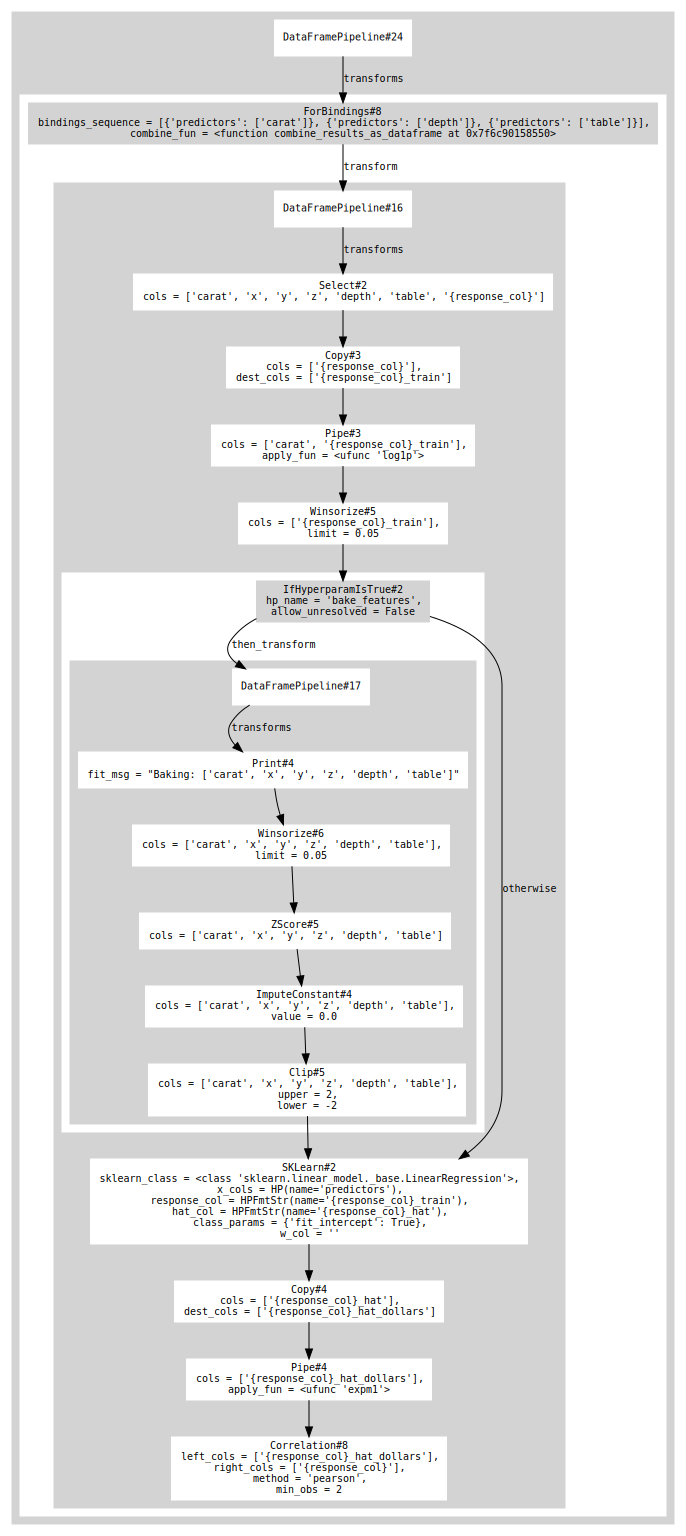

In [57]:
pip.visualize()

In [34]:
fit.state()[-1]

FitTransform(resolved_transform=ForBindings(tag='1', bindings_sequence=[{'predictors': ['carat']}, {'predictors': ['depth']}, {'predictors': ['table']}], transform=DataFramePipeline(tag='12', transforms=[ReadDataset(tag='4', paths=['./diamonds.csv'], columns=None, format='csv', filter=None, index_col='index', dataset_kwargs=None, scanner_kwargs=None), Select(tag='1', cols=['carat', 'x', 'y', 'z', 'depth', 'table', '{response_col}']), Copy(tag='1', cols=['{response_col}'], dest_cols=['{response_col}_train']), Winsorize(tag='3', cols=['{response_col}_train'], limit=0.05), Pipe(tag='1', cols=['carat', '{response_col}_train'], apply_fun=<ufunc 'log1p'>), Print(tag='3', fit_msg="Baking: ['carat', 'x', 'y', 'z', 'depth', 'table']", apply_msg=None, dest=None), Winsorize(tag='4', cols=['carat', 'x', 'y', 'z', 'depth', 'table'], limit=0.05), ZScore(tag='4', cols=['carat', 'x', 'y', 'z', 'depth', 'table'], w_col=None), ImputeConstant(tag='3', cols=['carat', 'x', 'y', 'z', 'depth', 'table'], valu

In [35]:
# Good TODOs:
# [x] Optimize StatelessTransform.fit() not to submit/always use DummyBackend?
# Impure Transforms like data readers.
# [x] BasePipeline.fit() and FitTransform[BasePipeline, ...] should chain backend submissions, like BasePipeline.apply()
# [x] Backend.fit()/apply() methods. apply() overloaded for FitTransform, StatelessTransform, BasePipeline.
# [x] ForBindings: combine_fun param, maybe generic in DataResult; DataFramePipeline expects specialized for DataFrames
# Start parallelizing appropriate transforms: ForBindings, Join, GroupByCols, GroupByBindings

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
index,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [20]:
from sklearn.linear_model import LinearRegression

FEATURES = ["carat", "x", "y", "z", "depth", "table"]

def bake_features(cols) -> ff.DataFramePipeline:
    return (
        ff.DataFramePipeline(tag="bake_features")
        .winsorize(cols, limit=0.05)
        .z_score(cols)
        .impute_constant(cols, 0.0)
        .clip(cols, upper=2, lower=-2)
    )

# per-cut feature means
per_cut_means = (
    ff.DataFramePipeline(tag="per_cut_means")
    .group_by_cols(["cut"])
        .then(
            ff.DataFramePipeline()
            [ff.HP("predictors")]
            .stateful_lambda(
                fit_fun=lambda df: df.mean(),
                apply_fun=lambda df, mean: mean.rename(lambda c: f"cut_mean_{c}")
            )
        )
)

complex_pipeline = (
    ff.DataFramePipeline()
    .select(FEATURES + ["{response_col}", "cut"])
    .copy("{response_col}", "{response_col}_train")
    .pipe(["carat", "{response_col}_train"], np.log1p)
    .winsorize("{response_col}_train", limit=0.05)
    .if_hyperparam_is_true("bake_features", bake_features(FEATURES))
    .join(per_cut_means, how="left", on="cut")
    .sk_learn(
        LinearRegression,
        # x_cols=["carat", "depth", "table"],
        x_cols=ff.HPLambda(lambda bindings: bindings["predictors"] + [f"cut_mean_{c}" for c in bindings["predictors"]]),
        response_col="{response_col}_train",
        hat_col="{response_col}_hat",
        class_params={"fit_intercept": True},
        tag="reg-1",
    )
    # transform {response_col}_hat from log-dollars back to dollars
    .copy("{response_col}_hat", "{response_col}_hat_dollars")
    .pipe("{response_col}_hat_dollars", np.expm1)
)

complex_pipeline.hyperparams()

pip = read_diamonds.then(complex_pipeline)

In [9]:
bindings

{'response_col': 'price',
 'bake_features': True,
 'predictors': ['carat', 'x', 'y', 'z', 'depth', 'table']}

In [10]:
bake_features(FEATURES).then(per_cut_means).apply(df, bindings={"predictors": ["carat"]})

,cut,cut_mean_carat
0,Ideal,-0.212999
1,Premium,0.184370
2,Good,0.109845
3,Very Good,0.021025
4,Fair,0.481822


In [61]:
bindings

{'response_col': 'price',
 'bake_features': True,
 'predictors': ['carat', 'x', 'y', 'z', 'depth', 'table']}

In [62]:
pip.apply(bindings=bindings).head()

,carat,x,y,z,depth,table,price,cut,price_train,cut_mean_carat,cut_mean_x,cut_mean_y,cut_mean_z,cut_mean_depth,cut_mean_table,price_hat,price_hat_dollars
0,-1.251924,-1.345194,-1.345905,-1.343759,-0.207349,-1.206255,326,Ideal,6.300786,0.702837,5.507451,5.520080,3.401448,61.709401,55.951668,6.492920,659.449010
1,-1.251924,-1.345194,-1.345905,-1.343759,-1.663782,1.835534,326,Premium,6.300786,0.891955,5.973887,5.944879,3.647124,61.264673,58.746095,6.428955,618.526253
2,-1.251924,-1.345194,-1.345905,-1.343759,-2.000000,1.835534,327,Good,6.300786,0.849185,5.838785,5.850744,3.639507,62.365879,58.694639,6.370361,583.268904
3,-1.251924,-1.345194,-1.345905,-1.343759,0.563704,0.314640,334,Premium,6.300786,0.891955,5.973887,5.944879,3.647124,61.264673,58.746095,6.457764,636.633503
4,-1.218600,-1.297969,-1.298397,-1.190838,1.334757,0.314640,335,Good,6.300786,0.849185,5.838785,5.850744,3.639507,62.365879,58.694639,6.507080,668.867598


In [11]:
# logging.getLogger("frankenfit").setLevel(logging.DEBUG)
r = dask.apply(pip, bindings=bindings)
r.result().head()

,carat,x,y,z,depth,table,price,cut,price_train,cut_mean_carat,cut_mean_x,cut_mean_y,cut_mean_z,cut_mean_depth,cut_mean_table,price_hat,price_hat_dollars
0,-1.251924,-1.345194,-1.345905,-1.343759,-0.207349,-1.206255,326,Ideal,6.300786,0.702837,5.507451,5.520080,3.401448,61.709401,55.951668,6.492920,659.449010
1,-1.251924,-1.345194,-1.345905,-1.343759,-1.663782,1.835534,326,Premium,6.300786,0.891955,5.973887,5.944879,3.647124,61.264673,58.746095,6.428955,618.526253
2,-1.251924,-1.345194,-1.345905,-1.343759,-2.000000,1.835534,327,Good,6.300786,0.849185,5.838785,5.850744,3.639507,62.365879,58.694639,6.370361,583.268904
3,-1.251924,-1.345194,-1.345905,-1.343759,0.563704,0.314640,334,Premium,6.300786,0.891955,5.973887,5.944879,3.647124,61.264673,58.746095,6.457764,636.633503
4,-1.218600,-1.297969,-1.298397,-1.190838,1.334757,0.314640,335,Good,6.300786,0.849185,5.838785,5.850744,3.639507,62.365879,58.694639,6.507080,668.867598


In [11]:
pip

DataFramePipeline(tag='6', transforms=[ReadDataset(tag='1', paths=['./diamonds.csv'], columns=None, format='csv', filter=None, index_col='index', dataset_kwargs=None, scanner_kwargs=None), Join(tag='1', left=DataFramePipeline(tag='4', transforms=[Select(tag='3', cols=['carat', 'x', 'y', 'z', 'depth', 'table', '{response_col}', 'cut']), Copy(tag='3', cols=['{response_col}'], dest_cols=['{response_col}_train']), Winsorize(tag='3', cols=['{response_col}_train'], limit=0.05), Pipe(tag='3', cols=['carat', '{response_col}_train'], apply_fun=<ufunc 'log1p'>), IfHyperparamIsTrue(tag='2', hp_name='bake_features', then_transform=DataFramePipeline(tag='bake_features', transforms=[Winsorize(tag='4', cols=['carat', 'x', 'y', 'z', 'depth', 'table'], limit=0.05), ZScore(tag='2', cols=['carat', 'x', 'y', 'z', 'depth', 'table'], w_col=None), ImputeConstant(tag='2', cols=['carat', 'x', 'y', 'z', 'depth', 'table'], value=0.0), Clip(tag='2', cols=['carat', 'x', 'y', 'z', 'depth', 'table'], upper=2, lower=

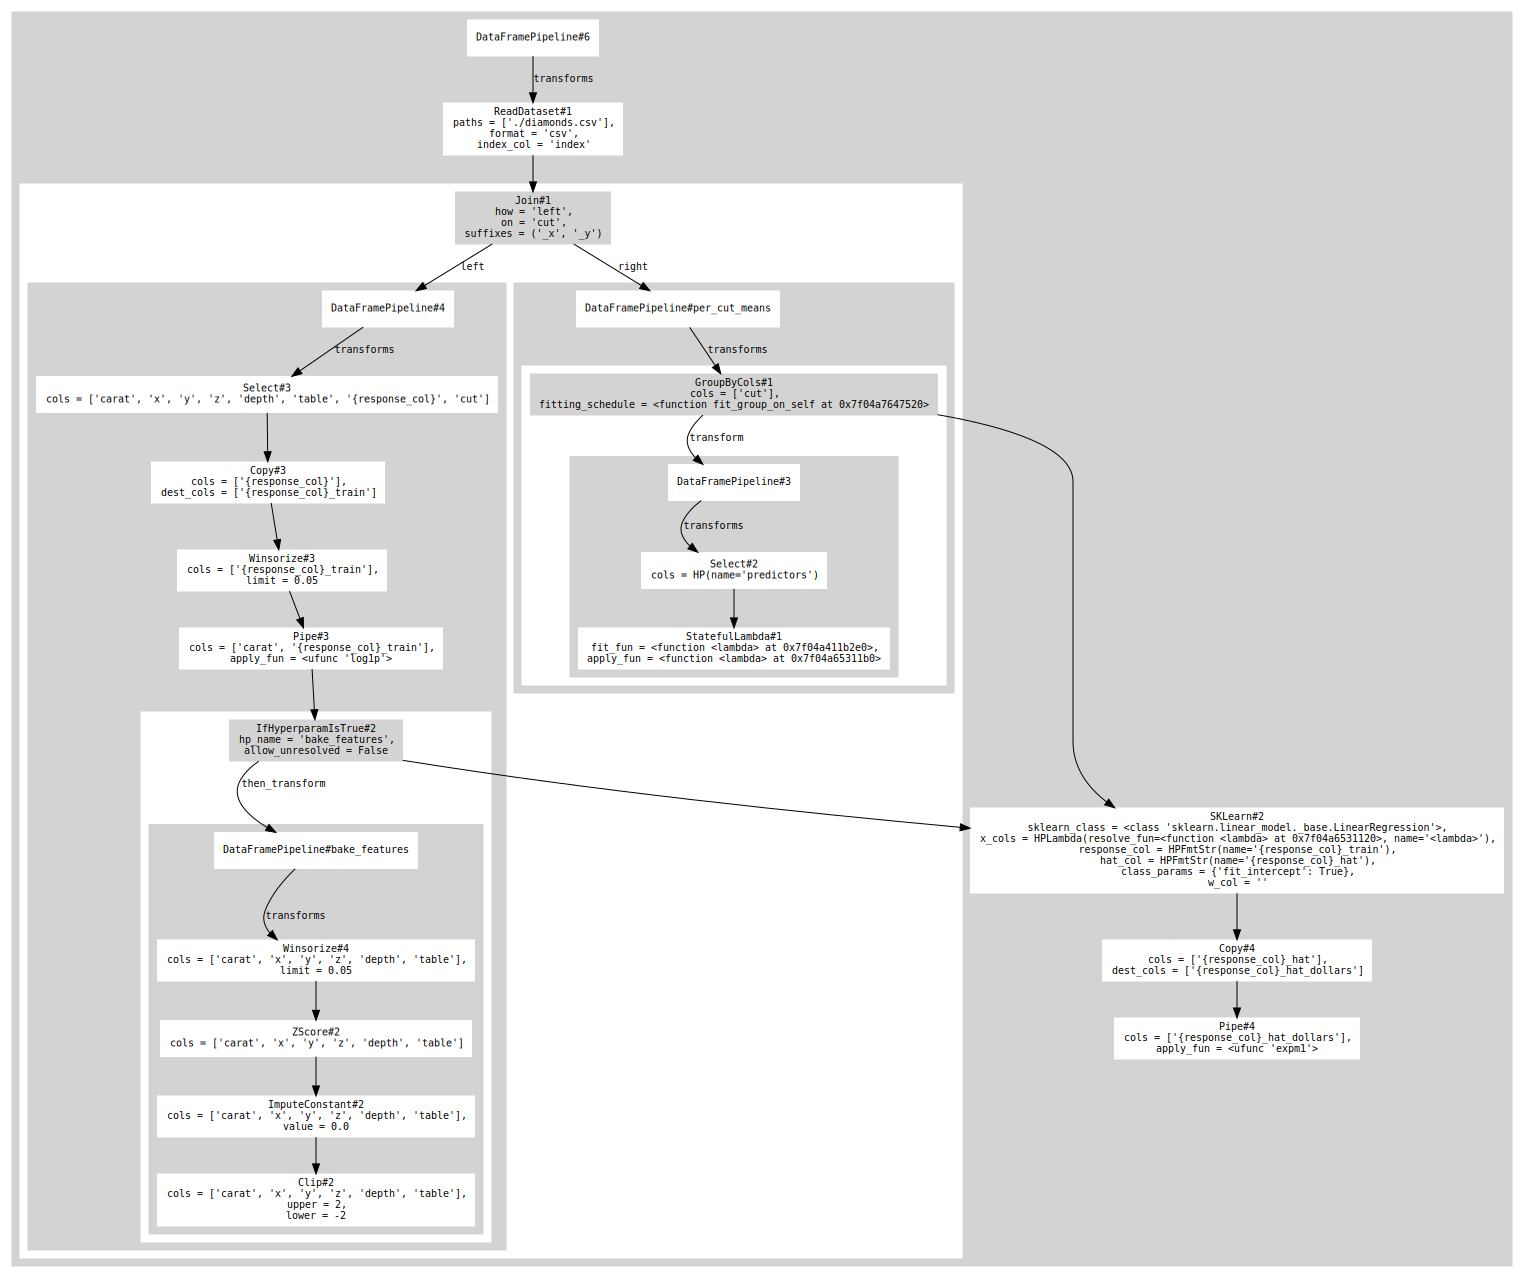

In [10]:
pip.visualize()

In [28]:
pip = (
    ff.DataFramePipeline()
    .group_by_bindings(
        [
            {"predictors": [p]} for p in FEATURES
        ],
    )
        .then(
            read_diamonds
            .then(complex_pipeline)
            .correlation(["{response_col}_hat_dollars"], ["{response_col}"])
        )
)

r = dask.apply(pip, bindings={"response_col": "price", "bake_features": True})
r.result()

# pip.visualize()

,price,predictors
price_hat_dollars,0.927042,['carat']
price_hat_dollars,0.929181,['x']
price_hat_dollars,0.931041,['y']
price_hat_dollars,0.925508,['z']
price_hat_dollars,-0.015971,['depth']
price_hat_dollars,0.137323,['table']


In [13]:
pip.apply(bindings={"response_col": "price", "bake_features": True})

,price,predictors
price_hat_dollars,0.927042,['carat']
price_hat_dollars,-0.015971,['depth']
price_hat_dollars,0.137323,['table']
price_hat_dollars,0.927026,"['carat', 'table']"


In [23]:
p = read_diamonds.then(complex_pipeline).on_backend(dask)
fit = p.fit(
    bindings={"response_col": "price", "bake_features": True, "predictors": ["depth"]}
)

In [25]:
fit.find_by_name("SKLearn#reg-1")

FitTransform(resolved_transform=SKLearn(tag='reg-1', sklearn_class=<class 'sklearn.linear_model._base.LinearRegression'>, x_cols=['depth', 'cut_mean_depth'], response_col='price_train', hat_col='price_hat', class_params={'fit_intercept': True}, w_col=''), state=<class 'sklearn.linear_model._base.LinearRegression'>, bindings={'response_col': 'price', 'bake_features': True, 'predictors': ['depth']})

In [27]:
df[["price_hat", "price_train", "price"]].corr()

,price_hat,price_train,price
price_hat,1.000000,0.015894,-0.017154
price_train,0.015894,1.000000,0.885960
price,-0.017154,0.885960,1.000000


In [22]:
df[["price_hat_dollars", "price"]].corr()

,price_hat_dollars,price
price_hat_dollars,1.000000,-0.015971
price,-0.015971,1.000000


In [31]:
df_fut = dask.put(df)
complex_pipeline.on_backend(dask).apply(df_fut, bindings=bindings)

/home/max/frankenfit/.venv-dev/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


,carat,x,y,z,depth,table,price,cut,price_train,cut_mean_carat,cut_mean_x,cut_mean_y,cut_mean_z,cut_mean_depth,cut_mean_table,price_hat,price_hat_dollars
0,0.000000,-1.345194,-1.345905,-1.343759,-0.214466,-1.206255,326,Ideal,6.300786,-0.213028,-0.204570,-0.197378,-0.204003,-0.026441,-0.712758,6.542583,693.077223
1,0.000000,-1.345194,-1.345905,-1.343759,-1.685856,1.835534,326,Premium,6.300786,0.191005,0.210059,0.181958,0.156826,-0.371053,0.676525,6.476986,649.008665
2,0.000000,-1.345194,-1.345905,-1.343759,-2.000000,1.835534,327,Good,6.300786,0.136061,0.104438,0.113576,0.155561,0.639461,0.479171,6.425400,616.327416
3,0.000000,-1.345194,-1.345905,-1.343759,0.564505,0.314640,334,Premium,6.300786,0.191005,0.210059,0.181958,0.156826,-0.371053,0.676525,6.492458,659.144074
4,0.000000,-1.297969,-1.298397,-1.190838,1.343476,0.314640,335,Good,6.300786,0.136061,0.104438,0.113576,0.155561,0.639461,0.479171,6.522659,679.385169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.037917,0.033754,0.041334,-0.043934,-0.820333,-0.192325,2757,Ideal,7.922261,-0.213028,-0.204570,-0.197378,-0.204003,-0.026441,-0.712758,7.845928,2554.307771
53936,0.037917,-0.022915,0.031832,0.124279,1.170372,-1.206255,2757,Good,7.922261,0.136061,0.104438,0.113576,0.155561,0.639461,0.479171,7.763809,2352.853298
53937,-0.013849,-0.051250,-0.034679,0.047819,0.910715,1.328569,2757,Very Good,7.922261,0.036405,0.021289,0.043956,0.039745,0.096947,0.248502,7.765671,2357.239247
53938,0.326714,0.411548,0.383393,0.323076,-0.647228,0.314640,2757,Premium,7.922261,0.191005,0.210059,0.181958,0.156826,-0.371053,0.676525,8.123867,3373.042288


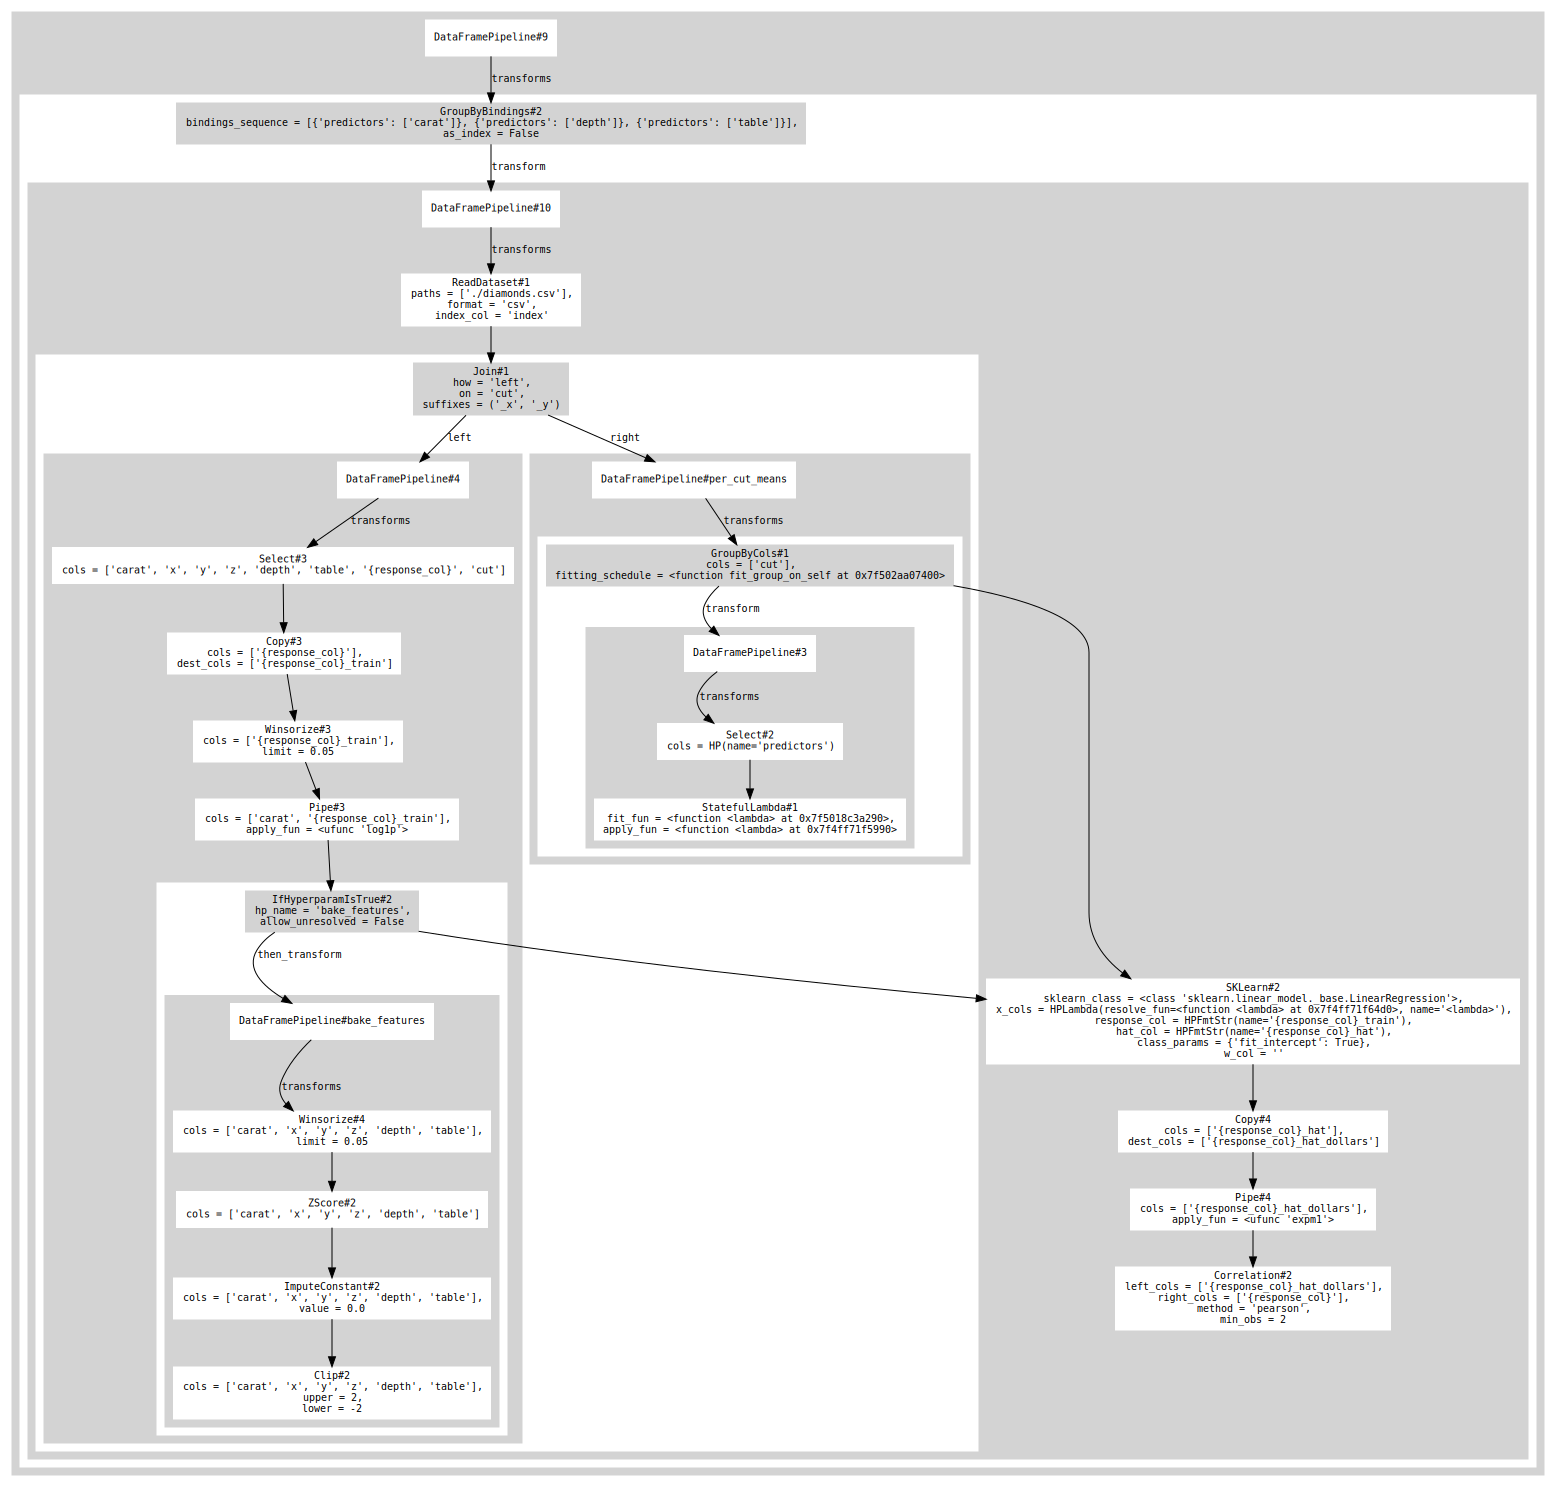

In [12]:
pip.visualize()

In [71]:
# parallel assignment
(
    ff.DataFramePipeline()
    .assign(
        foo="foo",
        bar=lambda df: "bar",
        baz=lambda df: "baz",
        frotz=lambda df: "frotz",
    )
).on_backend(dask).apply(df)

,carat,cut,color,clarity,depth,table,price,x,y,z,foo,bar,baz,frotz
index,,,,,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,foo,bar,baz,frotz
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,foo,bar,baz,frotz
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,foo,bar,baz,frotz
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,foo,bar,baz,frotz
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,foo,bar,baz,frotz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,foo,bar,baz,frotz
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,foo,bar,baz,frotz
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,foo,bar,baz,frotz
